In [1]:
import pandas as pd
import seaborn as sns

In [2]:
fmri = sns.load_dataset('fmri')

In [3]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


### 1. Data information

In [5]:
fmri.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


C:\Users\king5\AppData\Local\Temp\ipykernel_2088\2379652513.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  fmri.info(null_counts=True)


In [6]:
fmri.nunique()  # 몇 개씩 데이터가 있는지 확인

subject        14
timepoint      19
event           2
region          2
signal       1064
dtype: int64

In [7]:
fmri['event'].unique()

array(['stim', 'cue'], dtype=object)

In [8]:
fmri['region'].unique()

array(['parietal', 'frontal'], dtype=object)

In [9]:
fmri['subject'].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [10]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


### 2. Visualization

<Axes: xlabel='event', ylabel='signal'>

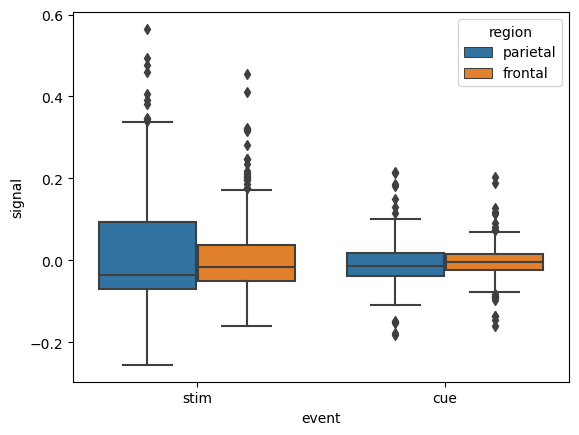

In [12]:
sns.boxplot(data=fmri, x='event', y='signal', hue='region')

### relplot - scatter 및 lineplot과 유사

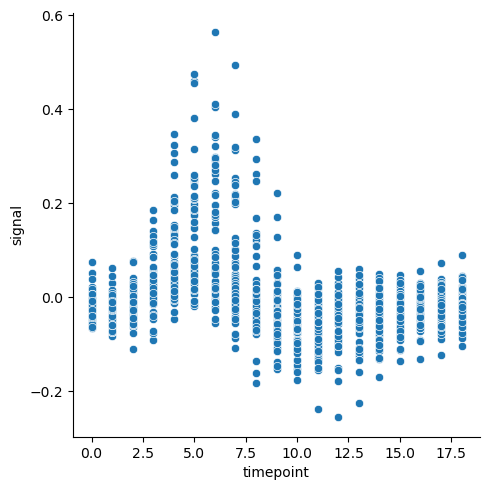

In [13]:
sns.relplot(data=fmri, x='timepoint', y='signal')

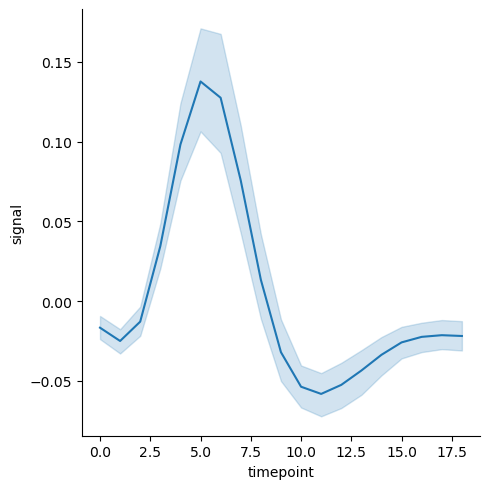

In [14]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line')

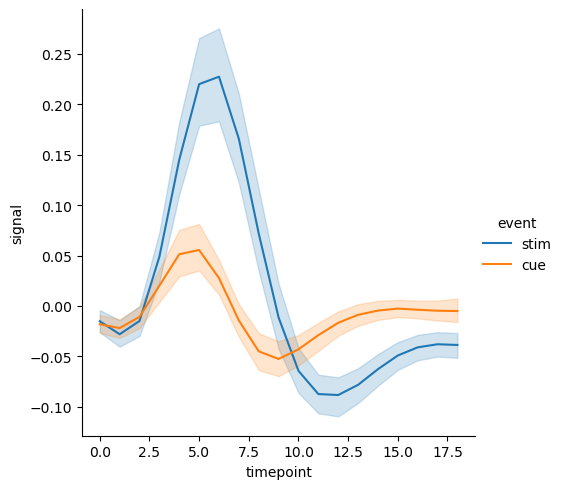

In [15]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='event')

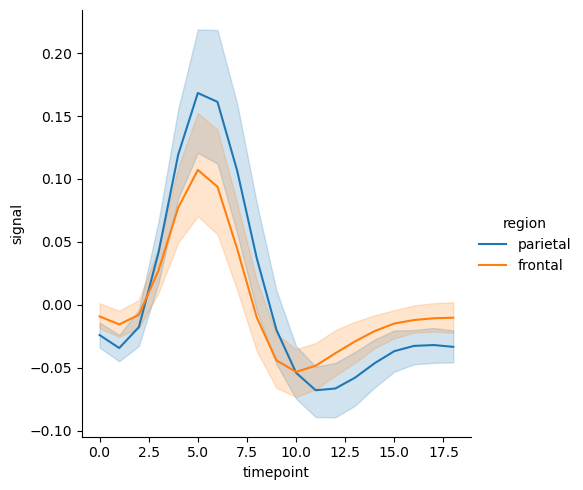

In [16]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='region')

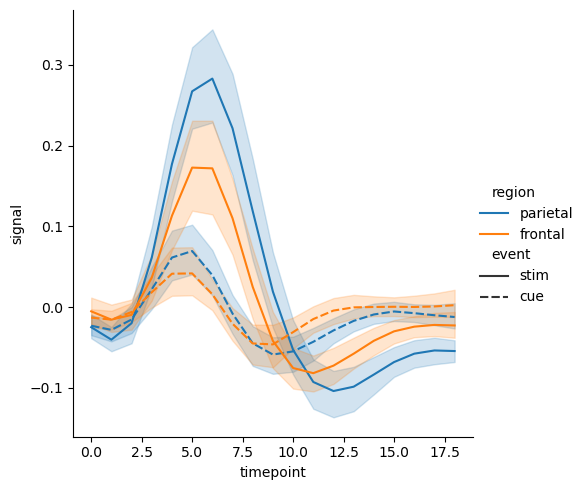

In [17]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='region', style='event')  # hue는 색깔로, style은 라인의 형태로 쪼갠다

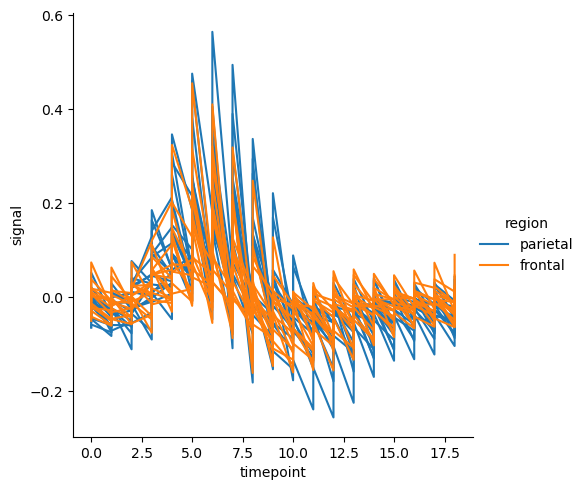

In [20]:
# sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='region', units='subject')
# estimator must be None when specifying units
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='region', units='subject', estimator=None)

In [23]:
data_1 = fmri.loc[fmri.event=='stim']

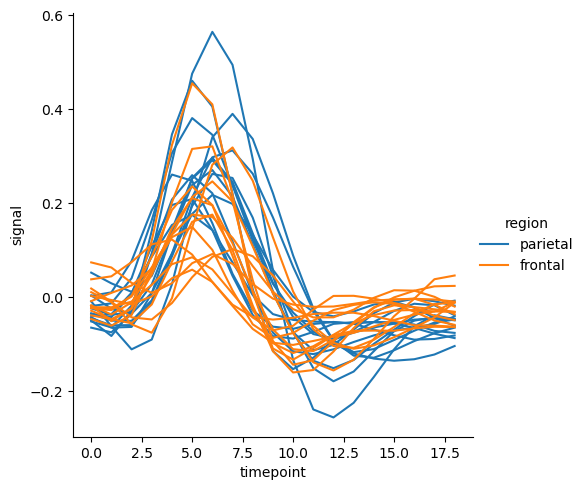

In [24]:
sns.relplot(data=data_1, x='timepoint', y='signal', kind='line', hue='region', units='subject', estimator=None)

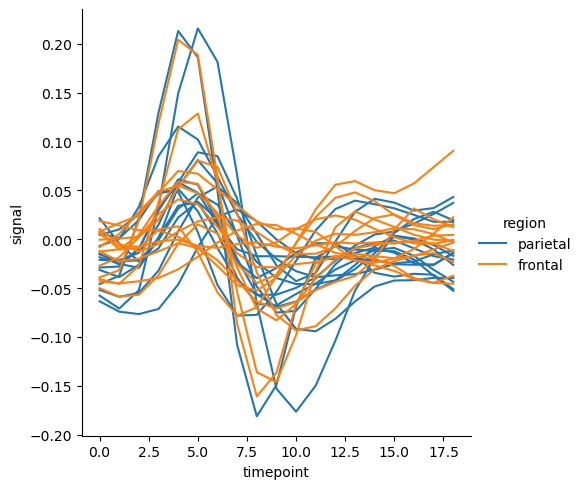

In [25]:
data_2 = fmri.loc[fmri.event=='cue']
sns.relplot(data=data_2, x='timepoint', y='signal', kind='line', hue='region', units='subject', estimator=None)

In [28]:
# fmri.loc[fmri.event=='stim']
fmri.query("event=='stim'")  # Query문으로 써도 데이터프레임에서 동일하게 사용할 수 있다!

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
527,s8,18,stim,frontal,-0.011114
528,s6,18,stim,frontal,0.046500
529,s5,18,stim,frontal,-0.031013
530,s4,18,stim,frontal,-0.063263


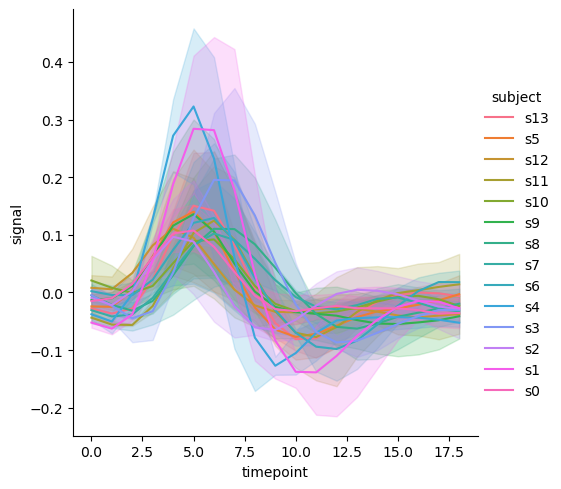

In [29]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='subject')

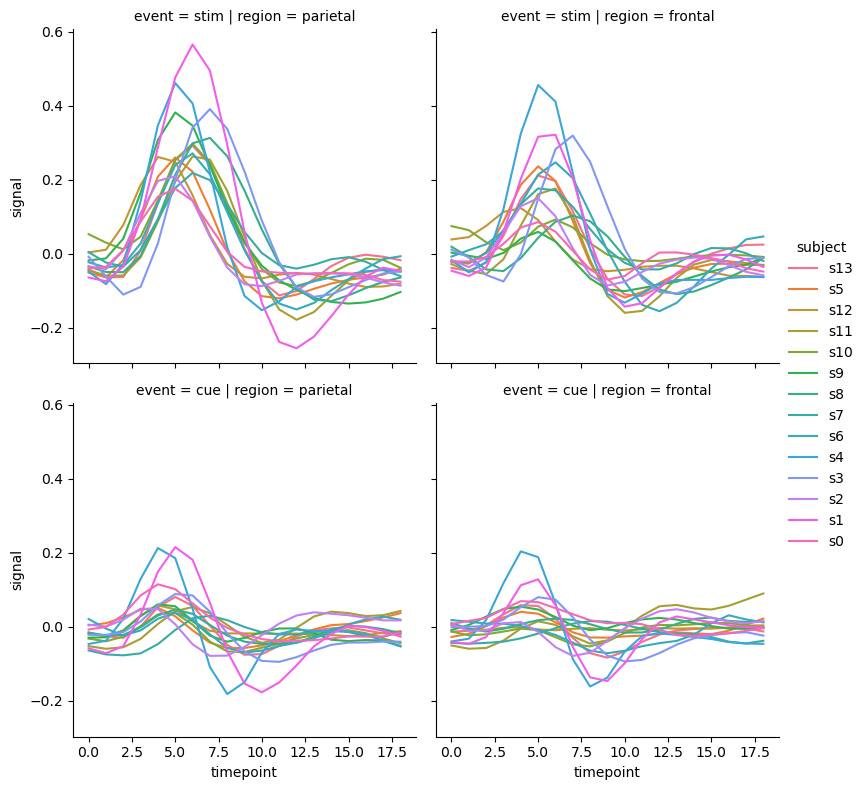

In [32]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='subject', col='region', row='event', height=4)

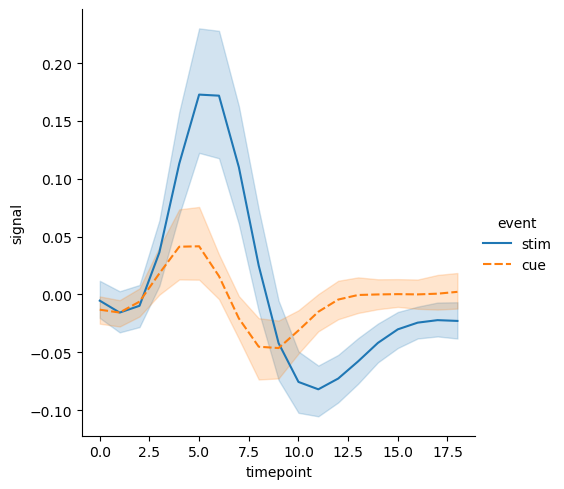

In [33]:
sns.relplot(data=fmri.query("region=='frontal'"), kind='line', x='timepoint', y='signal', hue='event', style='event')
# hue, style 같은 것 넣으면 둘 다 달라진다

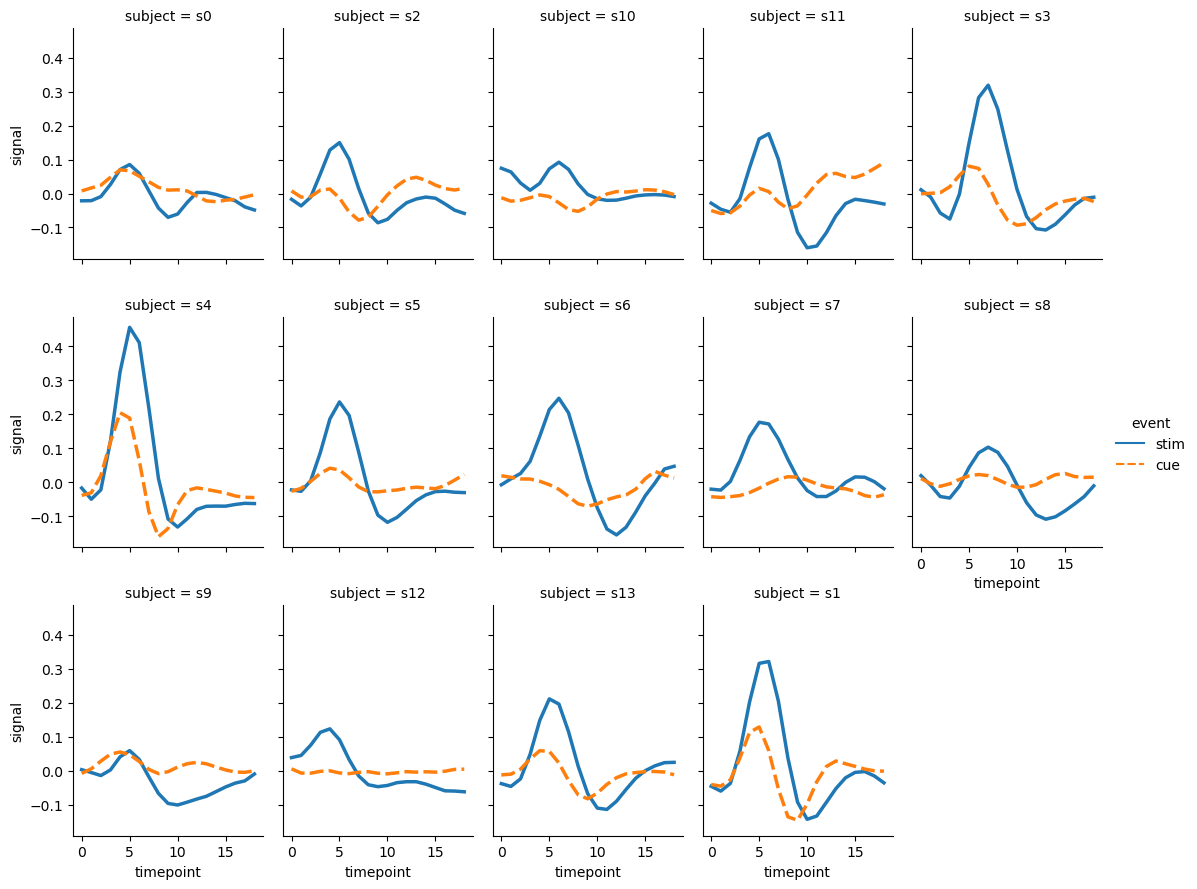

In [36]:
sns.relplot(data=fmri.query("region=='frontal'"), kind='line', x='timepoint', y='signal', hue='event', style='event',
           col='subject', col_wrap=5, height=3, aspect=0.75, linewidth=2.5)  # col_wrap 마다 라인을 바꿔서 출력, aspect 비율

<Axes: xlabel='timepoint', ylabel='signal'>

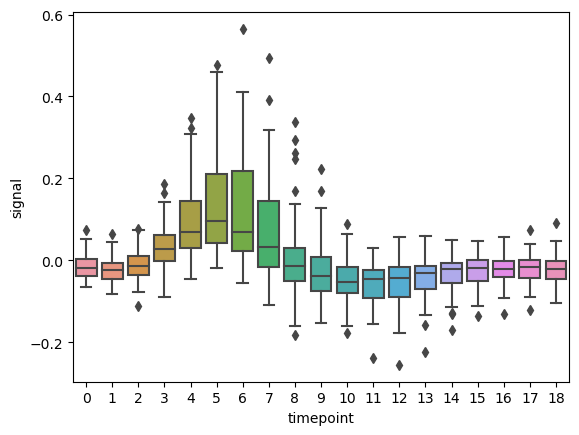

In [40]:
sns.boxplot(data=fmri, x='timepoint', y='signal')

<Axes: xlabel='timepoint', ylabel='signal'>

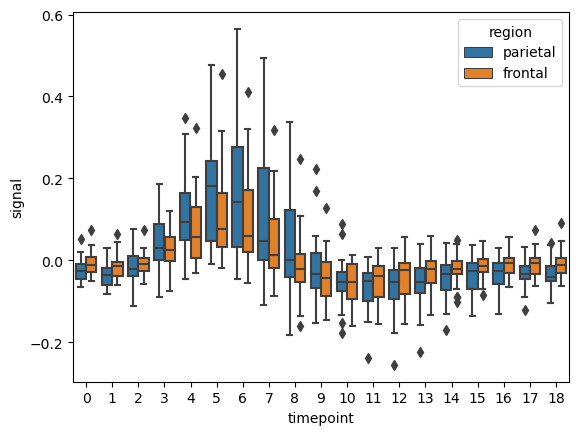

In [39]:
sns.boxplot(data=fmri, x='timepoint', y='signal', hue='region')

<Axes: xlabel='timepoint', ylabel='signal'>

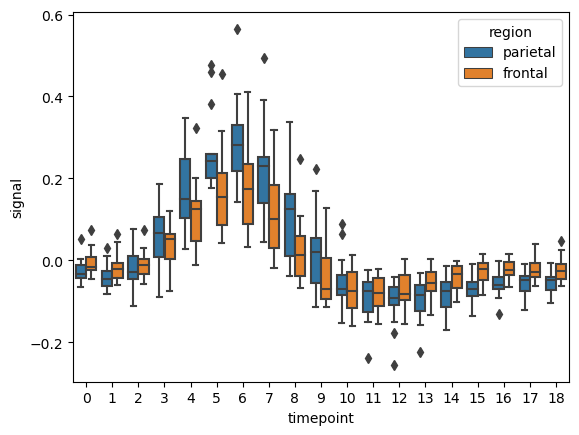

In [41]:
sns.boxplot(data=fmri.query("event=='stim'"), x='timepoint', y='signal', hue='region')

<Axes: xlabel='timepoint', ylabel='signal'>

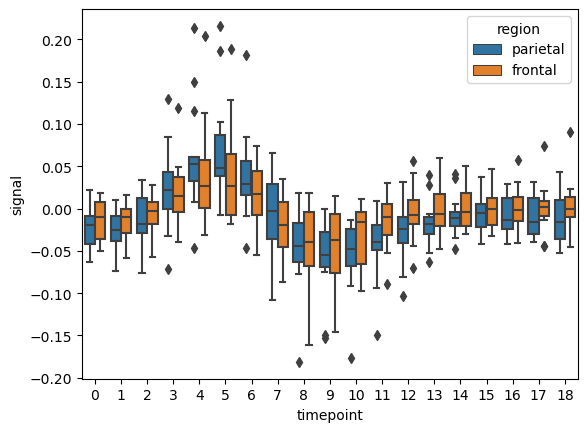

In [42]:
sns.boxplot(data=fmri.query("event=='cue'"), x='timepoint', y='signal', hue='region')